# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

#  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers,utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import regularizers

Using TensorFlow backend.


In [2]:
data=pd.read_csv("compresive_strength_concrete.csv")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
y=data['Concrete compressive strength(MPa, megapascals) '].copy()
x=data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1).copy()

In [5]:
x.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
x.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [7]:
from sklearn import preprocessing

standard = preprocessing.scale(x)
print(standard)

x =pd.DataFrame(standard  , columns=x.columns) 

[[ 2.47791487 -0.85688789 -0.84714393 ...  0.86315424 -1.21767004
  -0.27973311]
 [ 2.47791487 -0.85688789 -0.84714393 ...  1.05616419 -1.21767004
  -0.27973311]
 [ 0.49142531  0.79552649 -0.84714393 ... -0.52651741 -2.24091709
   3.55306569]
 ...
 [-1.27008832  0.75957923  0.85063487 ... -1.03606368  0.0801067
  -0.27973311]
 [-1.16860982  1.30806485 -0.84714393 ...  0.21464081  0.19116644
  -0.27973311]
 [-0.19403325  0.30849909  0.3769452  ... -1.39506219 -0.15074782
  -0.27973311]]


In [8]:
x.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


<AxesSubplot:>

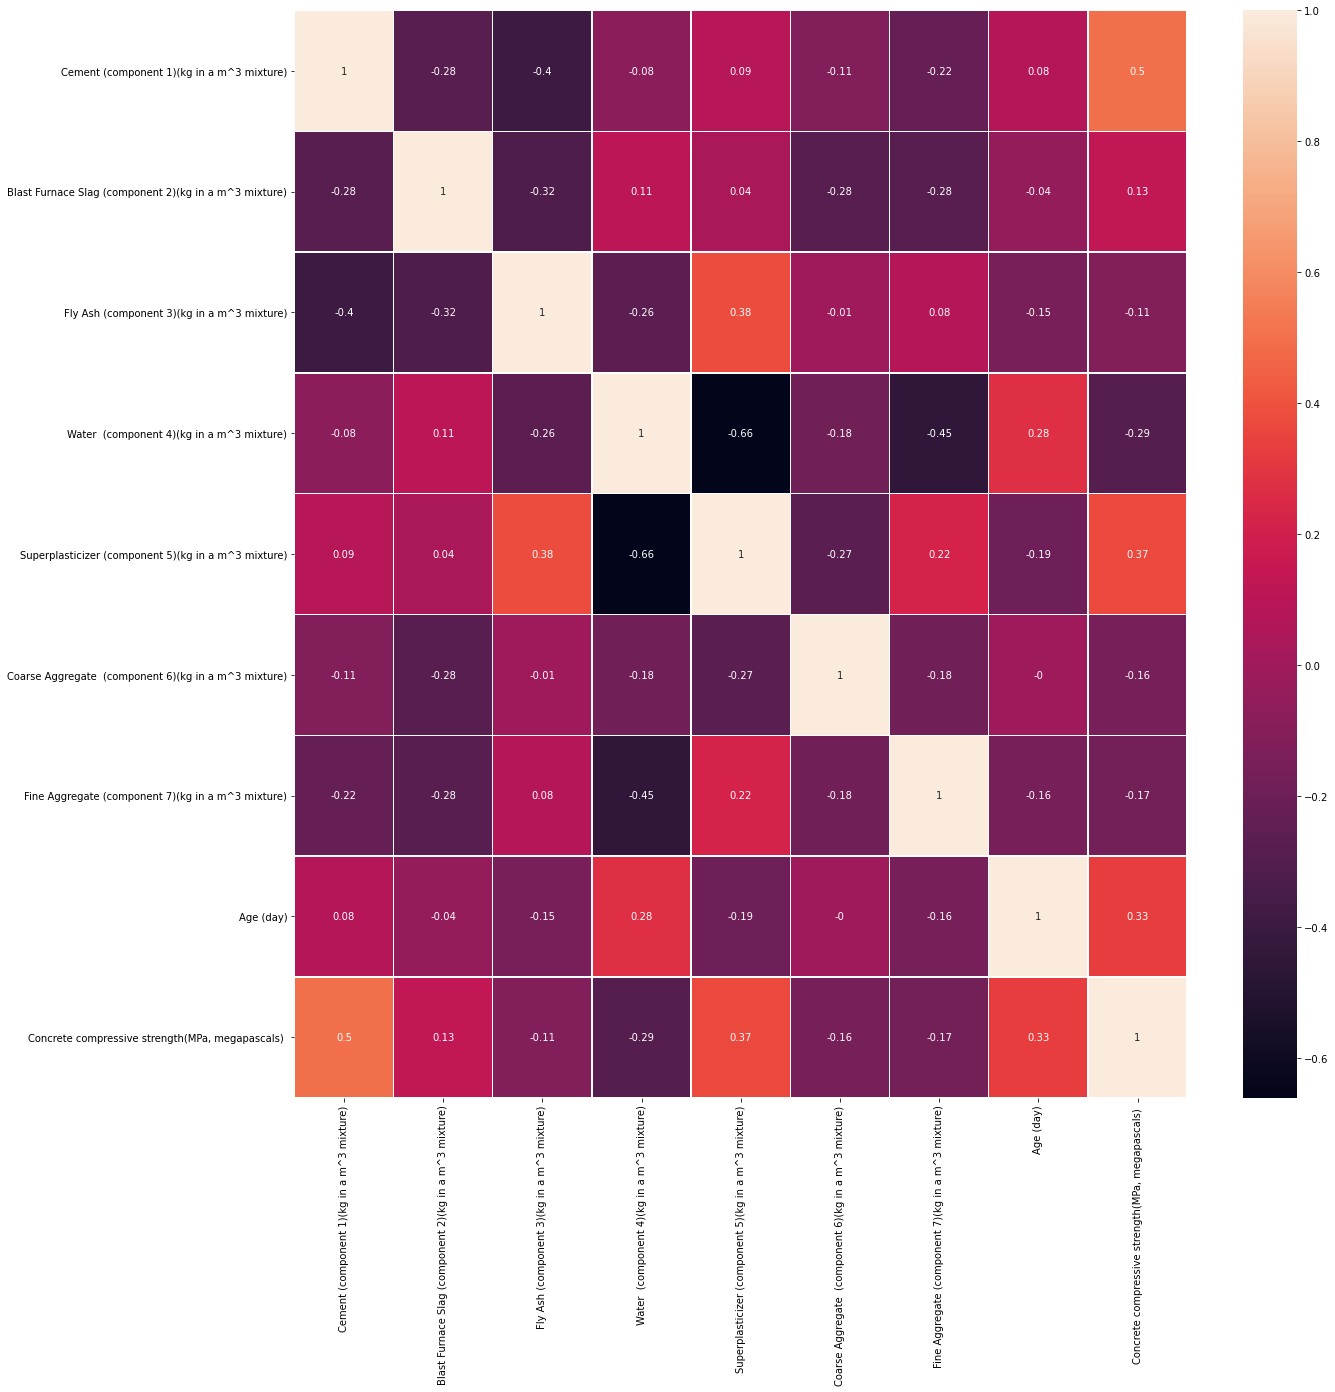

In [9]:
import seaborn as sns
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(20,20))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,linewidths=.5,ax=ax)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
part_x_train,x_validation,part_y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [11]:
x.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


In [58]:
#Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
model = Sequential()
model.add(Dense(8,input_shape=(8,), activation= "relu"))
model.add(Dense(10, activation= "relu"))
model.add(Dense(8, activation= "relu"))
model.add(Dense(6, activation= "relu"))
model.add(Dense(1))
model.compile( loss='mse', optimizer='rmsprop', metrics=['mae'])

In [59]:
model.fit(part_x_train,part_y_train,epochs=100,validation_data=(x_validation,y_validation),batch_size=100)

Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 1s 1ms/sample - loss: 1576.0123 - mae: 36.0989 - val_loss: 1574.1186 - val_mae: 35.4129
Epoch 2/100
576/576 [==============================] - 0s 71us/sample - loss: 1566.0559 - mae: 35.9676 - val_loss: 1565.4594 - val_mae: 35.2980
Epoch 3/100
576/576 [==============================] - 0s 64us/sample - loss: 1557.7542 - mae: 35.8558 - val_loss: 1557.3472 - val_mae: 35.1894
Epoch 4/100
576/576 [==============================] - 0s 71us/sample - loss: 1549.4563 - mae: 35.7451 - val_loss: 1548.9192 - val_mae: 35.0764
Epoch 5/100
576/576 [==============================] - 0s 69us/sample - loss: 1540.7354 - mae: 35.6283 - val_loss: 1540.0243 - val_mae: 34.9566
Epoch 6/100
576/576 [==============================] - 0s 66us/sample - loss: 1531.3878 - mae: 35.5027 - val_loss: 1530.3701 - val_mae: 34.8266
Epoch 7/100
576/576 [==============================] - 0s 76us/sample - loss: 1521.3122 - m

In [60]:
model.evaluate(x_test,y_test)

309/309 [==============================] - 0s 74us/sample - loss: 148.5859 - mae: 9.8875


[148.58586866261504, 9.887472]

In [61]:
model.predict(x_test).sum()

10805.575